# Import General Packages and Modules

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Import the Datafile as a dataframe

Dataset is found here, for a Ford Stay Alert:
https://www.kaggle.com/datasets/sivabalana/ford-stay-alert

In [7]:
# Data is split into Test and Train data from Kaggle. Train  data does not have the respective alertness column, thus we must split train data...
 
# ****THIS WILL HAVE TO CHANGE FOR EACH PERSON'S LOCATION OF THIS FILE AND THE LOCATION OF THE fordTrain.csv FILE****
path = "C:/Users/Jay/Documents/Github/MSE413-ML/Project/fordTrain.csv"
sens_train_df = pd.read_csv(path)
print(f"Shape of dataframe is: {sens_train_df.shape}")
print(f"Headings of the dataframe are:")

#P1 - P8  Represent Physicological Data
#E1 - E11 Represent Environmental Data
#V1 - V11 Represents Vehicular Data 
sens_train_df.head(10)

Shape of dataframe is: (604329, 33)
Headings of the dataframe are:


,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
5,0,5,0,34.3729,13.64440,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2016,0,13.4,0,4,14.7498
6,0,6,0,34.3851,10.16540,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2016,0,13.4,0,4,14.7578
7,0,7,0,34.4313,13.32700,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7729
8,0,8,0,34.4970,17.71240,1400,42.8571,0.290601,592,101.351,...,0.070,752,5.99375,0,2011,0,13.4,0,4,14.7835
9,0,9,0,34.5994,6.88282,1400,42.8571,0.290601,592,101.351,...,0.175,752,5.99375,0,2012,0,13.4,0,4,14.7757


## Data Discovery

array([[<Axes: title={'center': 'TrialID'}>,
        <Axes: title={'center': 'ObsNum'}>,
        <Axes: title={'center': 'IsAlert'}>,
        <Axes: title={'center': 'P1'}>, <Axes: title={'center': 'P2'}>,
        <Axes: title={'center': 'P3'}>],
       [<Axes: title={'center': 'P4'}>, <Axes: title={'center': 'P5'}>,
        <Axes: title={'center': 'P6'}>, <Axes: title={'center': 'P7'}>,
        <Axes: title={'center': 'P8'}>, <Axes: title={'center': 'E1'}>],
       [<Axes: title={'center': 'E2'}>, <Axes: title={'center': 'E3'}>,
        <Axes: title={'center': 'E4'}>, <Axes: title={'center': 'E5'}>,
        <Axes: title={'center': 'E6'}>, <Axes: title={'center': 'E7'}>],
       [<Axes: title={'center': 'E8'}>, <Axes: title={'center': 'E9'}>,
        <Axes: title={'center': 'E10'}>, <Axes: title={'center': 'E11'}>,
        <Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>],
       [<Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>,
        <Axes: title={'cente

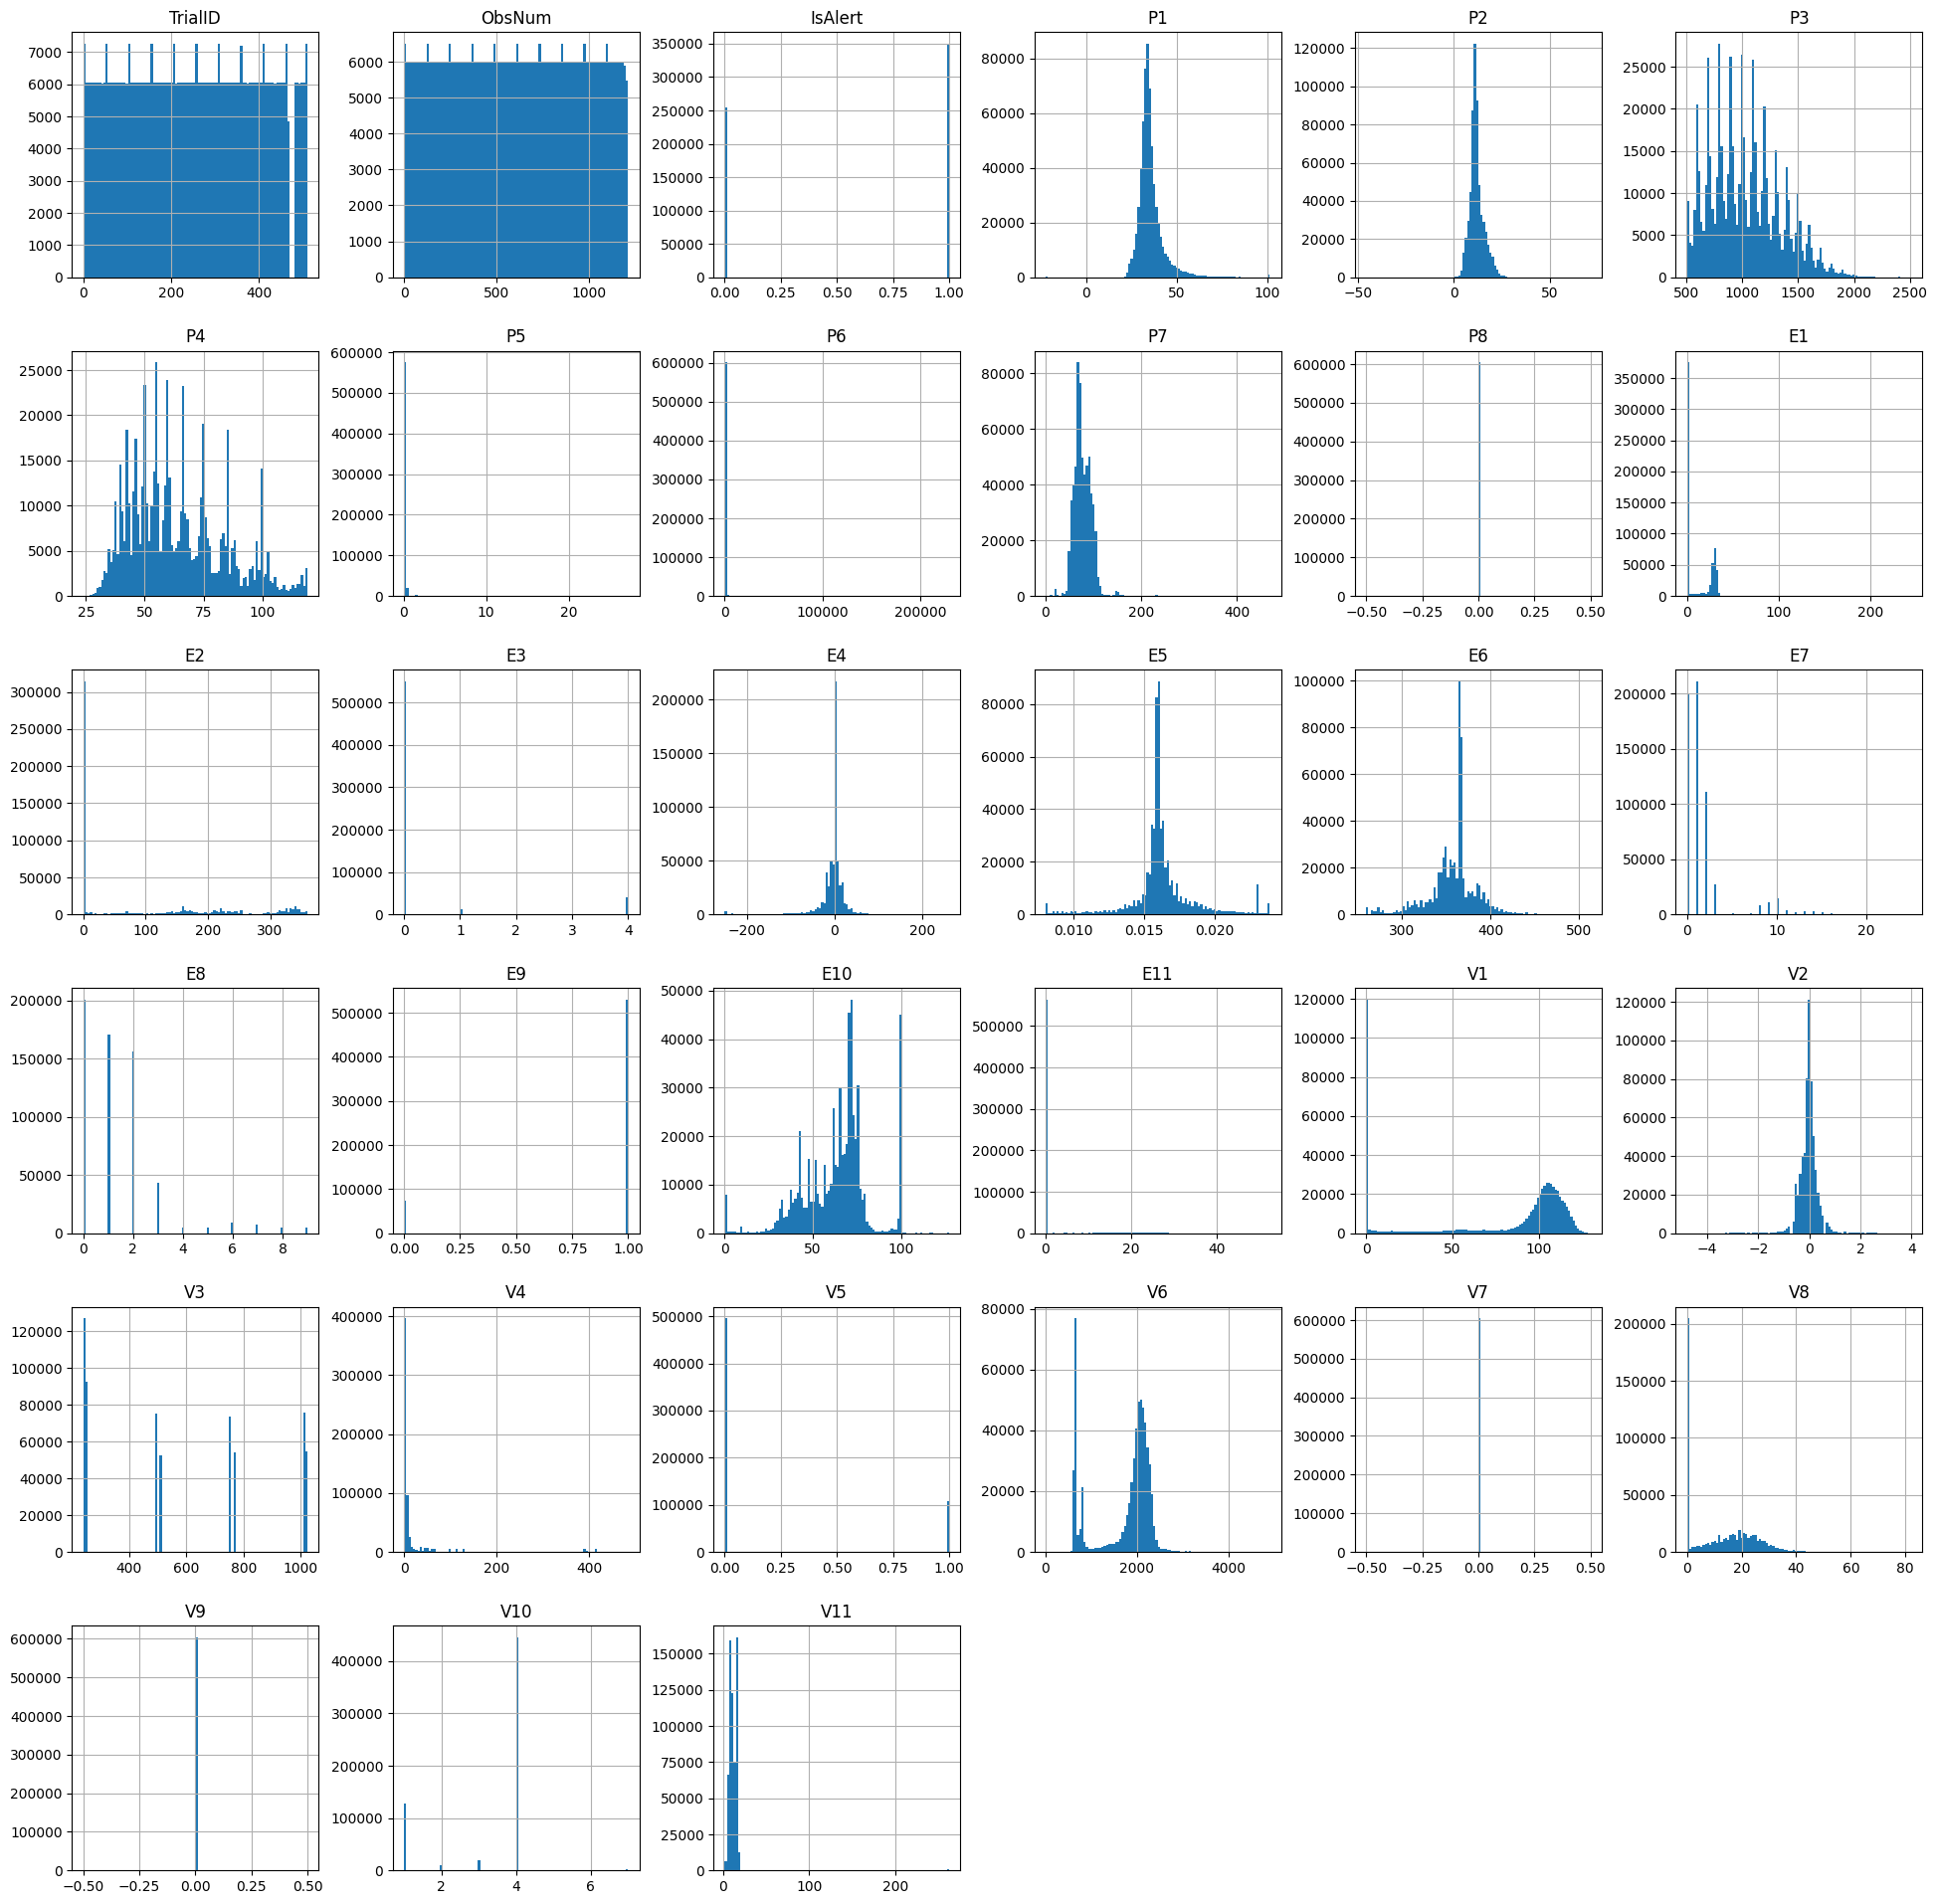

In [8]:
sens_train_df.hist(bins=100, figsize=(24,24))

In [9]:
# Check if NaN values are present in the data
# Check for NaN values in the entire DataFrame
nan_values = sens_train_df.isna().any()

# Print the columns with NaN values
print("Columns with NaN values:")
print(nan_values[nan_values].index.tolist())

# Check for NaN values in specific columns (e.g., P6, P8, V7, V9)
specific_nan_values = sens_train_df[['P6', 'P8', 'V7', 'V9']].isna().any()

# Print the specific columns with NaN values
print("\nNaN values in specific columns:")
print(specific_nan_values[specific_nan_values].index.tolist())

Columns with NaN values:
[]

NaN values in specific columns:
[]


In [11]:
# Check if columns contain only zeros
zero_columns = sens_train_df.columns[(sens_train_df == 0).all()]

# Print the columns with only zeros
print("Columns with only zeros:")
print(zero_columns)

# Drop Zero Columns, Obs #, and Trial ID. All irrelevent data

sens_train_df = sens_train_df.drop(columns=["TrialID", "ObsNum", "P8", "V7", "V9"])
sens_train_df.head()

Columns with only zeros:
Index(['P8', 'V7', 'V9'], dtype='object')


,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,...,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0.0,0.0,...,0.0,101.96,0.175,752,5.99375,0,2005,13.4,4,14.8004
1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0.0,0.0,...,0.0,101.98,0.455,752,5.99375,0,2007,13.4,4,14.7729
2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0.0,0.0,...,0.0,101.97,0.280,752,5.99375,0,2011,13.4,4,14.7736
3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0.0,0.0,...,0.0,101.99,0.070,752,5.99375,0,2015,13.4,4,14.7667
4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0.0,0.0,...,0.0,102.07,0.175,752,5.99375,0,2017,13.4,4,14.7757


In [12]:
corr_matrix = sens_train_df.corr()
is_alert_corr = corr_matrix['IsAlert']
is_alert_corr =is_alert_corr.abs().sort_values(ascending=False)
# Pretty bad correlation with these features. Namely, they're E9, E7, E8, V1, V10, V6, P7
# It seems Environmental matters a lot more, then vehicular, and then physiological. We can more accurately measure environment and vehicle, so this is good.
# Also P8 V7 and V9 are 0 at all values, which is why they show NaN. Also can consider them garbage 
is_alert_corr

IsAlert    1.000000
E9         0.380353
E7         0.329722
E8         0.283440
V1         0.269967
V10        0.259607
V6         0.244150
P7         0.189796
E6         0.189198
V8         0.165550
E1         0.160830
E3         0.157973
V11        0.155722
E2         0.105495
V4         0.097022
E11        0.079002
E5         0.067453
E10        0.067051
V3         0.062000
V5         0.055429
V2         0.050740
E4         0.047992
P5         0.038160
P1         0.018361
P2         0.014383
P4         0.008177
P3         0.005168
P6         0.000400
Name: IsAlert, dtype: float64

Class Counts:
IsAlert
1    349785
0    254544
Name: count, dtype: int64

Class Proportions:
IsAlert
1    0.578799
0    0.421201
Name: count, dtype: float64


C:\Users\Jay\AppData\Local\Temp\ipykernel_10384\2644775446.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_counts = pd.value_counts(Y)


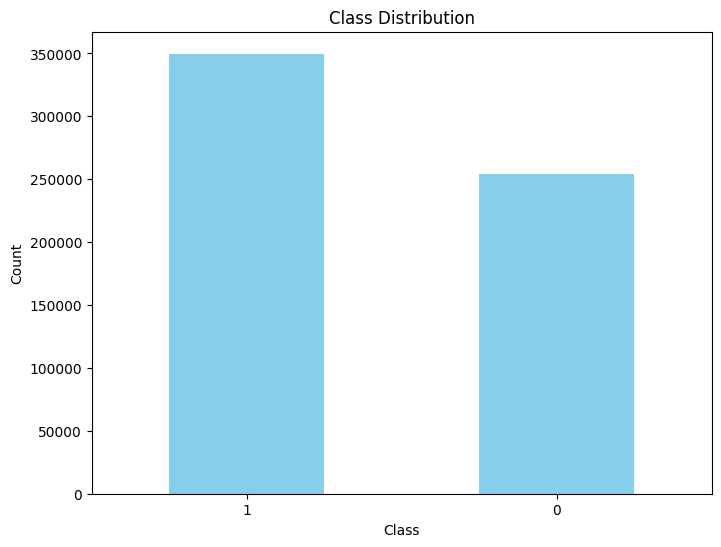

In [13]:
Y = sens_train_df["IsAlert"]
X = sens_train_df.drop(columns=["IsAlert"])
# Check if Y classes are balanced
class_counts = pd.value_counts(Y)
class_proportions = class_counts / len(Y)

print("Class Counts:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

# Plot class distribution
class_counts.plot(kind='bar', rot=0, color='skyblue', figsize=(8, 6))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Create training data

In [14]:
# I will use X_train, Y_train, X_test, Y_test to represent testing and training data globally.
# Capitals are global (X, Y), lowcase will be in given functions (ie. x_test, y_test)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Actually lets use K-Fold Cross Validation cause it seems easier and built in with SKLearn!
# Lets hit it with a classic 80/20 Split. Stratify Y due to the class imbalanced shown above

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)


# Splitting data into training and temporary sets (85% for training and temporary)
#X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)
# Further splitting the temporary set into cross-validation and testing sets (50-50 split)
#X_cv, X_test, Y_cv, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, stratify=Y_temp, random_state=42)

# Stratifty the above target ("IsAlert") such that the data will be split so that the proportion
# of classes in the target variable "Y" is ~ the same in training and testing

# Scale the data:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#delete temp data:
#del X_temp, Y_temp

# Create Functions for Investigating Metrics of the Models 

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, y_pred):
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.5f)' % auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def model_attribute_eval(x_test, y_test, model):
    
    y_pred_test = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    conf_matrix = confusion_matrix(y_test, y_pred_test)

    print("Model:", model)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print(f"Confusion Matrix: \n {conf_matrix[0]}\n {conf_matrix[1]}")
    print(f"Specficity: {conf_matrix[0,0] /(conf_matrix[0,0]+conf_matrix[0,1])}")

    # Plot the ROC and AUC
    plot_roc_curve(y_test, y_pred_test)

# 1. Logistic Regression

Logistic Regression with no Tuning of Hyper Parameters

Model: LogisticRegression()
Accuracy: 0.7896678966789668
Precision: 0.8002831906142539
Recall: 0.8483068170447561
F1 Score: 0.8235955368047075
Confusion Matrix: 
 [36099 14810]
 [10612 59345]
Specficity: 0.7090887662299397


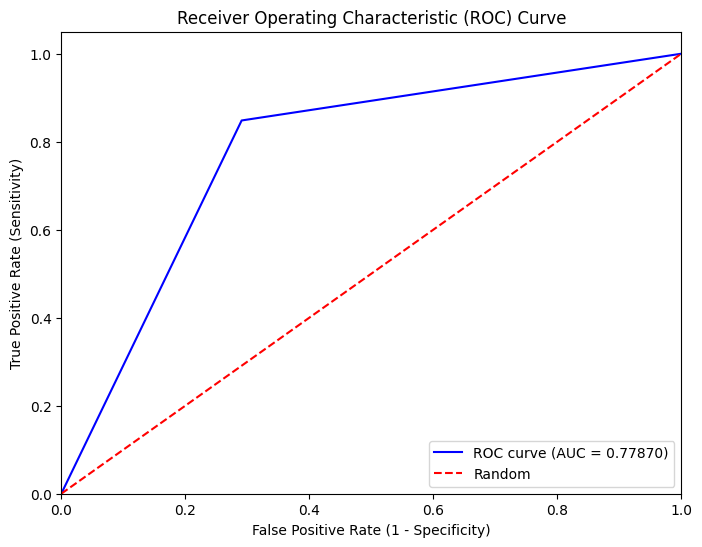

In [60]:
from sklearn.linear_model import LogisticRegression
# Non-optimized Logistic Regression
logr = LogisticRegression()
logr.fit(X_train, Y_train)

model_attribute_eval(X_test, Y_test, logr)
predicted_logr = logr.predict(X_test)


Logistic Regression with tuning of the hyperparameters

In [53]:
# Lets attempt to optimize the hyperparameters associated with Logistic Regression
# Namely, the solver used for optimization. The type of penalty function for regularization. The bias attached to regularization
# A standard way to do this is by using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-2, 2, 5),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1000, 2500, 5000]
    }
]

logr = LogisticRegression()
KFolds = 10
grid_search = GridSearchCV(logr, param_grid, cv=KFolds, scoring='roc_auc') # Is f1_score the best method of checking? Especially cause of the class imbalance?

grid_search.fit(X_train, Y_train)

print(f"Hyperparamters: {grid_search.best_params_}")

c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conver

Hyperparamters: {'C': 0.01, 'max_iter': 2500, 'penalty': 'l1', 'solver': 'saga'}


Model: LogisticRegression(C=0.01, max_iter=2500, penalty='l1', solver='saga')
Accuracy: 0.7904042493339731
Precision: 0.800514505831964
Recall: 0.8495933216118473
F1 Score: 0.8243240431891153
Confusion Matrix: 
 [36098 14811]
 [10522 59435]
Specficity: 0.7090691233377202


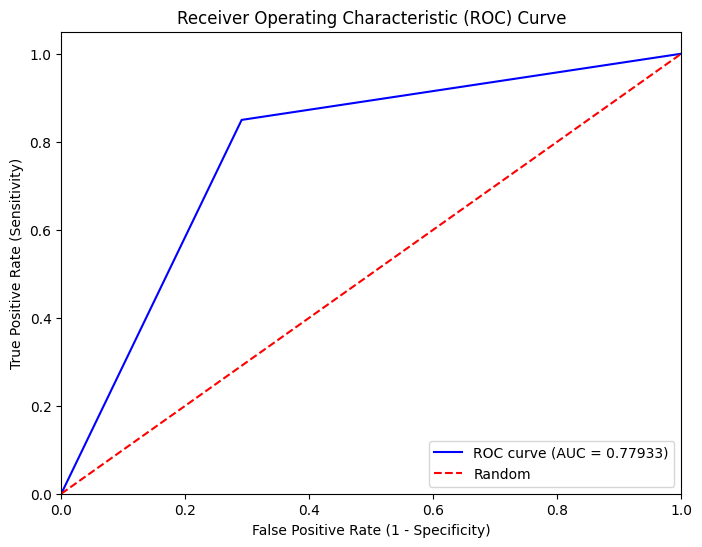

In [61]:
logr = LogisticRegression(penalty='l1', max_iter=2500, solver='saga', C=0.01)

logr.fit(X_train, Y_train)

model_attribute_eval(X_test, Y_test, logr)
predicted_logr = logr.predict(X_test)

# 2. (a) Decision Trees (Without Ensemble and Baggging and Boosting)

c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Model: DecisionTreeClassifier()
Accuracy: 0.616922873264607
Precision: 0.6138862677887115
Recall: 0.9113741298226053
F1 Score: 0.7336190777550844
Confusion Matrix: 
 [10808 40101]
 [ 6200 63757]
Specficity: 0.21230037910781985


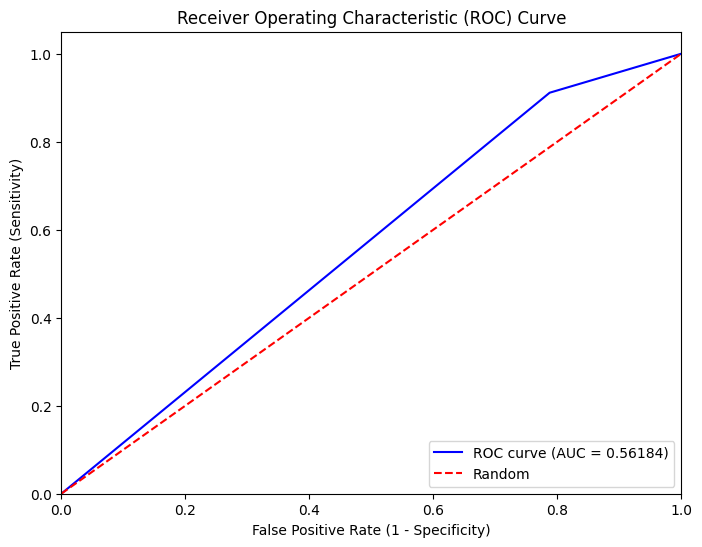

In [65]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,Y)

model_attribute_eval(X_test, Y_test, dtree)


## 2 (b) Decistion Tree with Tuning of Hyperparameters

In [73]:
# Lets look at tuning the hyper parameters! Since there's so many for DTs, we're going to use
# RandomizedSearchCV which randomly solves a fixed number of random combinations
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [15, 45, 90, None],
    'min_samples_split': [2, 5, 10, 40],
    'min_samples_leaf': [1, 2, 4, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree classifier
dtree = DecisionTreeClassifier()

# Perform grid search or randomized search
# grid_search = GridSearchCV(dtree, param_grid, cv=5)
random_search = RandomizedSearchCV(dtree, param_distributions=param_grid, n_iter=100, cv=5)

# Fit the search object to the training data
# grid_search.fit(X_train, Y_train)
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
# best_params = grid_search.best_params_
best_params = random_search.best_params_

c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    val

{'criterion': 'entropy', 'max_features': 'sqrt'}


c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Model: DecisionTreeClassifier(max_features='log2')
Accuracy: 0.49016265947412835
Precision: 0.586813873554838
Recall: 0.4026759294995497
F1 Score: 0.4776114341906716
Confusion Matrix: 
 [31074 19835]
 [41787 28170]
Specficity: 0.6103832328272015


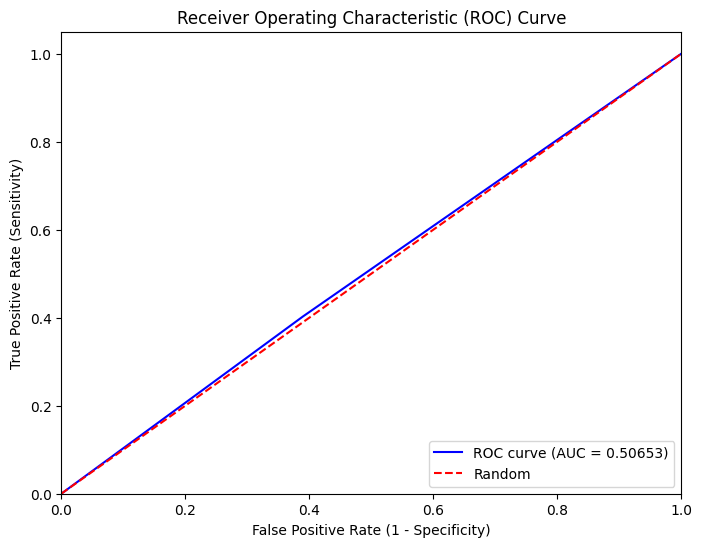

In [74]:
print(best_params)

dtree = DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2, max_features='sqrt', max_depth=None, criterion= 'entropy')
dtree = dtree.fit(X,Y)

model_attribute_eval(X_test, Y_test, dtree)

# 2(c) Decision Tree with Bagging

Model: BaggingClassifier(estimator=DecisionTreeClassifier())
Accuracy: 0.9927688514553307
Precision: 0.9922334801134339
Recall: 0.9952971110825222
F1 Score: 0.9937629344180404
Confusion Matrix: 
 [50364   545]
 [  329 69628]
Specficity: 0.9892946237403996


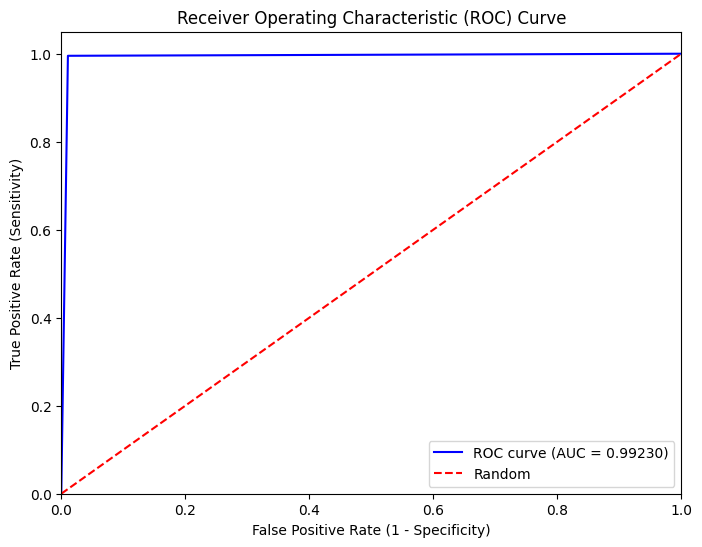

In [76]:
from sklearn.ensemble import BaggingClassifier

base_classifier_dt = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_classifier_dt, n_estimators=10)

bagging_classifier.fit(X_train, Y_train)

model_attribute_eval(X_test, Y_test, bagging_classifier)


## Lets tune the n_estimators

In [77]:
bagging_classifier_dt = BaggingClassifier(base_classifier_dt)
param_grid_bagging_DT = {'n_estimators': [1, 3, 5, 7, 9, 10]}

# Create GridSearchCV
grid_search_bagging_DT = GridSearchCV(bagging_classifier, param_grid_bagging_DT, scoring='roc_auc', cv=10)

# Fit the GridSearchCV object to the training data
grid_search_bagging_DT.fit(X_train, Y_train)

# Get the best estimator and its corresponding parameter
best_bagging_classifier = grid_search_bagging_DT.best_estimator_
best_n_estimators = grid_search_bagging_DT.best_params_['n_estimators']

# Print the best parameters and corresponding score
print("Best Number of Estimators:", best_n_estimators)
print("Best Score:", grid_search.best_score_)

Best Number of Estimators: 40
Best Score: 0.9993785281276594


# 2(d) Decision Trees with Boosting (Adaptive and Gradient)

c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
Accuracy: 0.8557245213707743
Precision: 0.8492279866476933
Recall: 0.9127892848464056
F1 Score: 0.8798622115053393
Confusion Matrix: 
 [39572 11337]
 [ 6101 63856]
Specficity: 0.7773085309080909


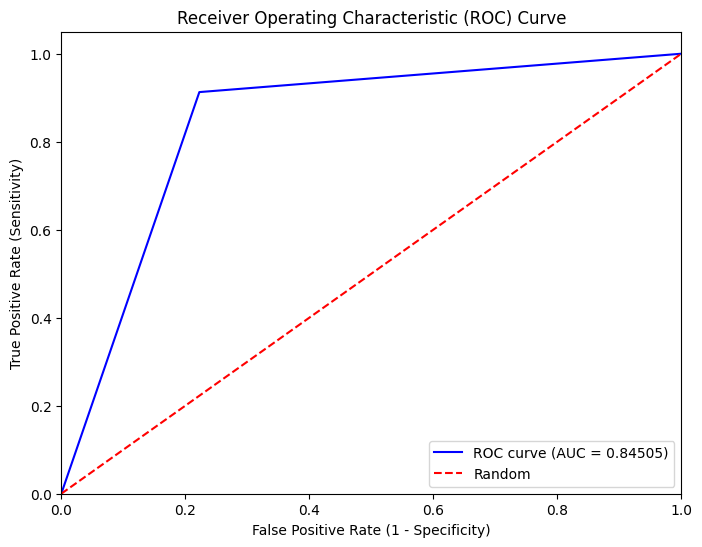

In [78]:
from sklearn.ensemble import AdaBoostClassifier

base_classifier_dt = DecisionTreeClassifier(max_depth=1)

ada_boost_DT_classifier = AdaBoostClassifier(base_estimator=base_classifier_dt, n_estimators=50)

# Fit the AdaBoost classifier to the training data
ada_boost_DT_classifier.fit(X_train, Y_train)

# Evaluate the AdaBoost classifier
model_attribute_eval(X_test, Y_test, ada_boost_DT_classifier)


Model: GradientBoostingClassifier(n_estimators=50)
Accuracy: 0.8701868184601128
Precision: 0.8502678629058285
Recall: 0.9415212201781095
F1 Score: 0.8935708374598093
Confusion Matrix: 
 [39310 11599]
 [ 4091 65866]
Specficity: 0.7721620931465949


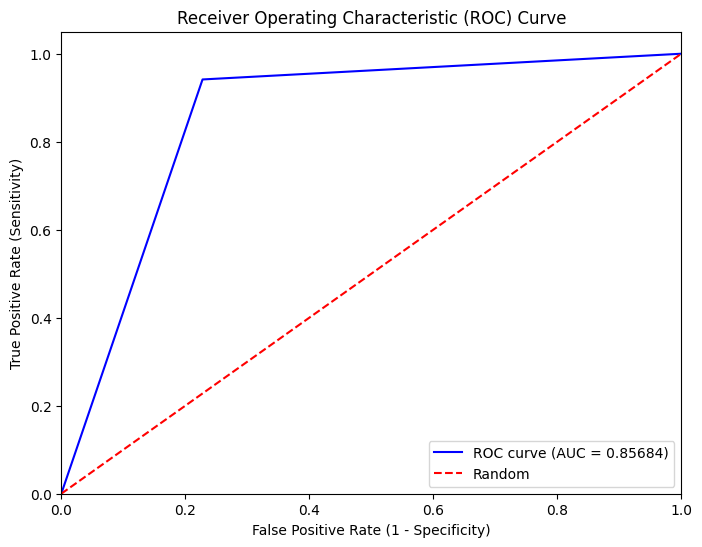

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_dt = GradientBoostingClassifier(n_estimators=50)
grad_boost_dt.fit(X_train, Y_train)

model_attribute_eval(X_test, Y_test, grad_boost_dt)

# 2(e) Tune the n_estimators for Boosting 

In [80]:
grad_boost_dt = GradientBoostingClassifier()
param_grid = {'n_estimators': [1, 3, 5, 7, 10]}

# Create GridSearchCV
grid_search_grad_boost_dt = GridSearchCV(grad_boost_dt, param_grid, scoring='roc_auc', cv=10)

# Fit the GridSearchCV object to the training data
grid_search_grad_boost_dt.fit(X_train, Y_train)

# Get the best estimator and its corresponding parameter
best_grad_boost_classifier = grid_search_grad_boost_dt.best_estimator_
best_n_estimators = grid_search_grad_boost_dt.best_params_['n_estimators']

# Print the best parameters and corresponding score
print("Best Number of Estimators:", best_n_estimators)
print("Best Score:", grid_search_grad_boost_dt.best_score_)

Best Number of Estimators: 160
Best Score: 0.9505775008924016


In [81]:
base_classifier_dt = DecisionTreeClassifier(max_depth=1)

ada_boost_classifier = AdaBoostClassifier(base_estimator=base_classifier_dt, n_estimators=50)
param_grid = {'n_estimators': [1, 3, 5, 7, 10]}

# Create GridSearchCV
grid_search_ada_boost_dt = GridSearchCV(ada_boost_classifier, param_grid, scoring='roc_auc', cv=10)

grid_search_ada_boost_dt.fit(X_train, Y_train)

# Fit the AdaBoost classifier to the training data
ada_boost_classifier.fit(X_train, Y_train)

# Evaluate the AdaBoost classifier

# Get the best estimator and its corresponding parameter
best_ada_boost_classifier = grid_search_ada_boost_dt.best_estimator_
best_n_estimators = grid_search_ada_boost_dt.best_params_['n_estimators']

# Print the best parameters and corresponding score
print("Best Number of Estimators:", best_n_estimators)
print("Best Score:", grid_search_grad_boost_dt.best_score_)

c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estima

Best Number of Estimators: 160
Best Score: 0.9505775008924016


# Random Forest (Bootstrap True vs Bootstrap False)

Model: RandomForestClassifier()
Accuracy: 0.994986183045687
Precision: 0.9924587789186656
Recall: 0.9989279128607573
F1 Score: 0.9956828382132934
Confusion Matrix: 
 [50378   531]
 [   75 69882]
Specficity: 0.9895696242314719


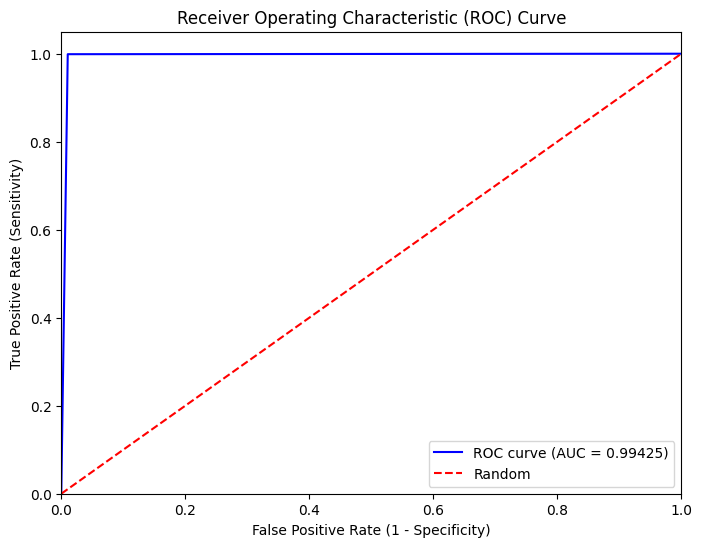

In [17]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(bootstrap=True) # Bootstrap is set to true 
RF_classifier.fit(X_train, Y_train)

model_attribute_eval(X_test, Y_test, RF_classifier)

Model: RandomForestClassifier(bootstrap=False)
Accuracy: 0.9969304849999172
Precision: 0.9958104141134894
Recall: 0.9988993238703775
F1 Score: 0.997352477324789
Confusion Matrix: 
 [50615   294]
 [   77 69880]
Specficity: 0.9942249896874816


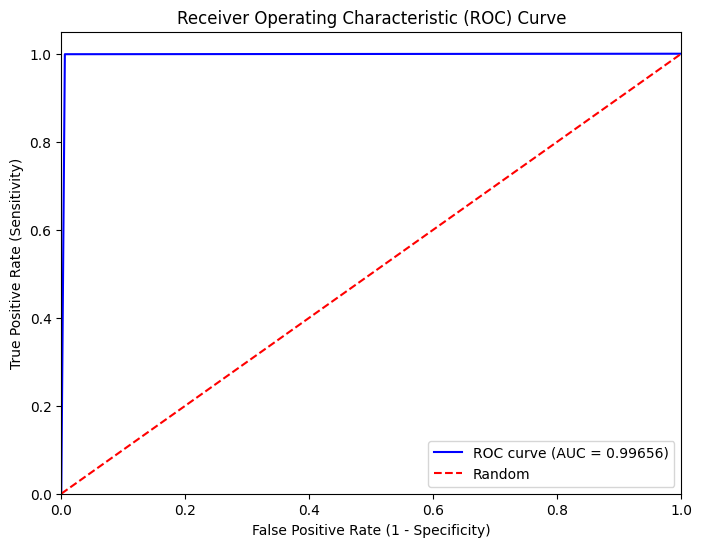

In [18]:
RF_classifier = RandomForestClassifier(bootstrap=False) # Bootstrap is set to False now 
RF_classifier.fit(X_train, Y_train)

model_attribute_eval(X_test, Y_test, RF_classifier)

# Better result, with added complexity, Leads to higher accuracy and AUC score, but honestly, so barely. 
# 

Lets try and find the ideal number of n_estimators. Lets do intervals of 20 and then narrow it down, with cross validation

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid_RF = {
    'n_estimators': [30, 60, 90, 120]
}

grid_search_RF_classifier = GridSearchCV(estimator=RandomForestClassifier(bootstrap=False), param_grid=param_grid_RF, cv=5, scoring='roc_auc')

grid_search_RF_classifier.fit(X_train, Y_train)

grid_search_RF_classifier.best_params_

{'n_estimators': 120}

In [27]:
from sklearn.model_selection import GridSearchCV
base_RF_classifier = RandomForestClassifier(bootstrap=True)

param_grid_RF = {
    'n_estimators': [30, 60, 90, 120]
}

grid_search_RF_classifier = GridSearchCV(base_RF_classifier, param_grid=param_grid_RF, cv=5, scoring='roc_auc')

grid_search_RF_classifier.fit(X_train, Y_train)

grid_search_RF_classifier.best_params_



{'n_estimators': 120}

# SVM With Kernalization